### Packages Used

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.io.wavfile
import random

from IPython.display import *
import glob 


All packages used are included with and anaconda install of Jupyter Notebook.  https://www.continuum.io/downloads

### Additioal Files Needed 

Download here: https://www.dropbox.com/s/q8ddnylifyfknhp/music.zip?dl=0

Please uncompress the .zip to the same directory as this notebook

# TO SAVE SPACE AUDIO HAS BEEN REMOVED FROM THE NOTEBOOK,RECOMMEND DOWNLOAD FULL NOTEBOOK HERE https://www.dropbox.com/s/5yx9s90dwecobho/Audio_Analysis.ipynb?dl=0
 

#  What Is Sound ?

Simply, sound is a variation in pressure over time.  This vibration travels though the air as a wave, where it is picked up by our ear's. One of the primary ways we classify different types of waves is by a waves cycles per second or Hertz (Hz).

Sound is inherently an analog signal, so computer systems store sound as digital approximations of that analog signal. This approximation is found by sampling the waveform at a fixed time interval and storing each sample as a distinct number. 

## The Waveform 

Waveforms have three different properties that define their sound characteristics: Phase, Frequency, and Amplitude. All complcated wavfomes can be broken down into basics componets known as Sinusodial Partials.   

$$\large{ A \cdot sin(\omega t +\phi })$$

$$\small Amplitude  = A$$
$$\small Frequency = \omega$$
$$\small Phase = \phi$$




### Amplitude 

Varriations in the hight of the sine wave, this is most simmilar to the loudness or intersity of the sound being produced. 

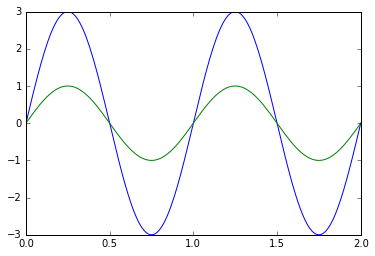

In [5]:
amplitude_1 = 3
amplitude_2 = 1
freq = 1 #hz
time = 2 #seconds 
sample_rate = 100 # samples per second
number_samples = sample_rate * time

wave_time = np.linspace(0,time,number_samples)
waveform_1 = [amplitude_1 * np.sin(freq * t * 2*np.pi) for t in wave_time]
waveform_2 = [amplitude_2 * np.sin(freq * t * 2*np.pi) for t in wave_time]

plt.plot(wave_time, waveform_1)
plt.plot(wave_time,waveform_2)

Compare the sound from both 

The plot above illustrates the effect of changes in amplitude on a shape and the sound of a waveform. The blue waveform has as amplitude of value 3, where as the green waveform has an amplitude of value 1. So the blue wave oscillates between the values of 3 and -3, and the green wave oscillates between  the values of 1 and -1. 

### Frequency

Frequency changes the speed of the waves oscillations and the accompanying pitch.

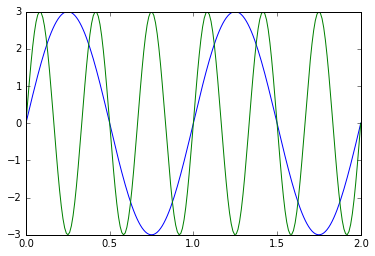

In [3]:
amplitude = 3
freq_1 = 1 #hz
freq_2 = 3 #hz
time = 2 #seconds 
sample_rate = 100 # samples per second
number_samples = sample_rate * time

wave_time = np.linspace(0,time,number_samples)
waveform_1 = [amplitude * np.sin(freq_1 * t * 2*np.pi) for t in wave_time]
waveform_2 = [amplitude * np.sin(freq_2 * t * 2*np.pi) for t in wave_time]

plt.plot(wave_time, waveform_1)
plt.plot(wave_time,waveform_2)

In the above plot notice that the green wave oscilates between 3 and -3 at a much faster rate that the blue wave. The green wave is ocilating at a rate of 3 Hz and the blue wave is ocilating at a rate of 1 Hz. For every one cycle of the blue wave the green wave has completed 3 cycles. This is one of the most important characteristics of a wave as it determines the pitch or note that the wave is playing. 

### Phase 

Phase is the the waveforms offset on the time scale. 

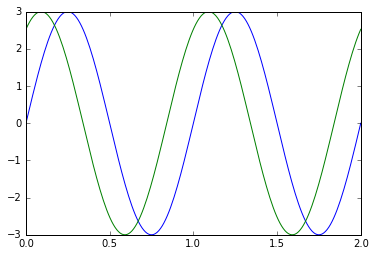

In [4]:
amplitude = 3
freq_1 = 1 #hz
phase_offset = 1
time = 2 #seconds 
sample_rate = 100 # samples per second
number_samples = sample_rate * time

wave_time = np.linspace(0,time,number_samples)
waveform_1 = [amplitude * np.sin(freq_1 * t * 2*np.pi) for t in wave_time]
waveform_2 = [amplitude * np.sin(freq * t * 2*np.pi + phase_offset) for t in wave_time]

plt.plot(wave_time, waveform_1)
plt.plot(wave_time,waveform_2)

The plot above illustrates the effect of a phase offset in a waveform. The green waveform is offset from the blue waveform by a value of 1.  

A good example of how phase effects sound is Piano Phase by minimalist composer Steve Reich.  The work is made up of a simple repeating melody, where two pianos play the melody at the same time. The only difference being that one of the pianos is slightly off phase from the other one, creating many different unique sound combinations.


http://www.pianophase.com/

### Lets make a sound 

Now that we know about the fundamental features of waveforms, lets use this to generate a sound, using a process known as FM Synthesis. To learn more about FM Synthesis I would recomend reading this: https://www.sfu.ca/~truax/fmtut.html

In [2]:
#based on  http://www.mrcolson.com/2016/04/21/Simple-Python-FM-Synthesis.html

class FMsynth(object):
    def __init__(self, f_carrier = 220, f_mod =220, Ind_mod = 10, length = 5, sampleRate = 44100):
        self.increment = .01
        self.f_carrier = f_carrier
        self.f_mod = f_mod
        self.Ind_mod = Ind_mod
        self.rate = sampleRate
        self.ident = id(self)
        sampleInc = 1.0/self.rate
        self.name = '%dHz_carrier-%dHz_mod-%s_Index_%d.wav' % (self.f_carrier, self.f_mod, str(self.Ind_mod),self.ident)
        x = np.arange(0,length, sampleInc)
        y = np.sin(2*np.pi*self.f_carrier*x + self.Ind_mod*np.sin(2*np.pi*self.f_mod*x))
        mx = 1.059*(max(abs(y))) # scale amplitude
        y = y/mx
        sound = np.asarray(32000*y, dtype = np.int16)
        self.sound = sound
        
        
    def FMplot(self):
        """Generates a plot of the waveform for the FMsynth"""
        inc = self.increment
        T = 1./self.f_carrier
        x = np.arange(0,T*1.01, T/100.0)
        y = np.sin(2*np.pi*self.f_carrier*x + self.Ind_mod*np.sin(2*np.pi*self.f_mod*x))
        mx = 1.059*(max(abs(y))) # scale to max pk of -.5 dB
        y = y/mx
        plt.plot(y, label = self.name)
        plt.axis([0,100,-1.1,1.1])
        labels = [str(round(1000*n,2)) for n in np.arange(0,T*1.01,T/10.0)]
        plt.xticks([n for n in np.arange(0, 101, 10)], labels)
        leg = plt.legend(fancybox=True)
        leg.get_frame().set_alpha(0.5)
        plt.xlabel('Milliseconds')
        plt.title('Source Waveform')
        plt.grid(True)
        plt.show()  
        
"""REMOVED TO SAVE SPACE"""       
#Audio(COOLSOUND.sound, rate = COOLSOUND.rate)    

'REMOVED TO SAVE SPACE'

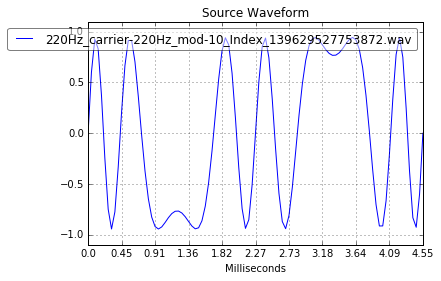

In [7]:
COOLSOUND = FMsynth()
COOLSOUND.FMplot()


## Waveform Example 

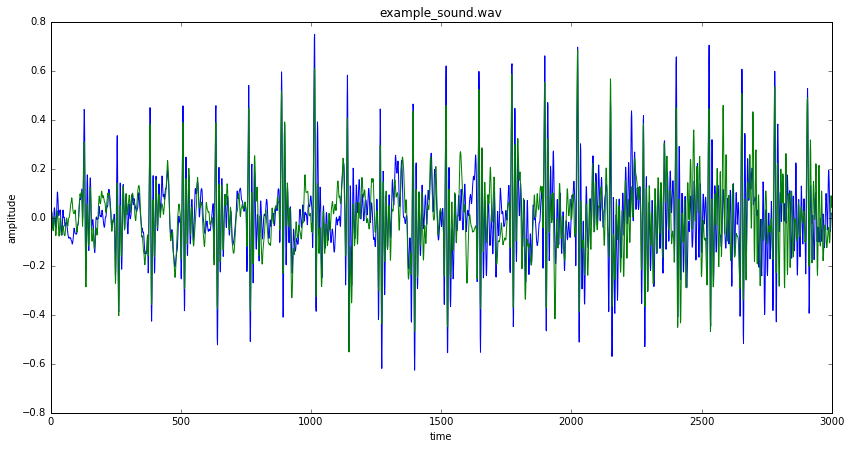

In [3]:
# inport the .wav file into python 
(sample_rate, signal) = scipy.io.wavfile.read("music/example_sound.wav")


### note find way to get leng in seconds 
dur = 7
# linear sereies of values from 1:len(sound)
time = wave_time = np.linspace(0,dur, sample_rate * dur)

# plot the waveform
fig_wav = plt.figure()
fig_wav.set_size_inches(14,7)
subplt = fig_wav.add_subplot(111)
subplt.set_title("example_sound.wav")
subplt.set_xlabel("time")
subplt.set_ylabel("amplitude")
subplt.plot(signal[0:3000]) # plot the sound from time = 0 to time = 3000

In [3]:
"""REMOVED TO SAVE SPACE"""
#Audio(signal[:, 0], rate = sample_rate)

'REMOVED TO SAVE SPACE'

The plot above is the waveform of a synthesized melody. It is very complex, and has many changes in amplitude and frequency over time. This brings up the question on how would one mathematically represent this waveform? This is simply answered by the Superposition Principle, “ The principle of superposition may be applied to waves whenever two (or more) waves traveling through the same medium at the same time. The wave pass through each other without being disturbed. The net displacement of the medium at any point in space or time, is simply the sum of the individual wave displacements”  (http://www.acs.psu.edu/drussell/Demos/superposition/superposition.html) 
So simply put, that even the most complex song can be deconstructed into many simple waves  

# Sampling Theroy 

In [34]:
Image(url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Signal_Sampling.png/800px-Signal_Sampling.png")

Sound is analog and therefore it is a continuous signal. This means for it to be interpreted by a computer the sound must be sampled.  The image above demonstrates the basics of sampling, where a measurement of the waveform is taken periodically at a fixed time T.  This creates a continuous signal repressed by a series of discrete values that is easily stored in memory. 

The most important aspect of sampling a analog signal is the Sample Rate, or the average number of samples in one second. For example sound files stored on CD typically have a sample rate of 44.1 kHz. A lower sample rate increase the amount of Aliasing herd as the range of frequency that can be captures is smaller. Aliasing manifests its self audible distortion created by the sampling process. Similarly  a higher sampling rate means that a greater range or frequency can be captured and stored, but sample rates greater than a signals Nyquist frequency ( The optimal sample rate for a signal) captures frequency outside the range of human hearing so the laws of diminishing returns apply. 

# Fourier Transform 

It may be surprising to think, but even the most complex waveforms can be represented as a sum of many simple sine waves, all with different phase, frequency and amplitude. This brings up the interesting question on how do we find sample a complex waveform to find its fundamental frequency's that compose it. 

One of the best ways to understand the fundamental frequentness (also known as it's harmonics) that compose a sound is by looking at the waveform in the frequency domain.  Where the X axis of the plot is frequency in Hz.  This means we will need a method of conventing from the time domain of the waveform to the frequency domain. This process is known as a Fourier Transform. A good analogy for Fourier Transform is a prism breaking white light into its fundamental components of a rainbow. 

### Formal Definition of The Fourier Transform 

$$\large G(f) = \int_{-\infty }^{+\infty }g(t){e^{-i2\pi ft}}dt$$

The function above is a way to essentially integrate time out from the waveform.  The function builds a Fourier series: a linear combination of different sines and cosines.  As we increase the range of the integration to infinity , the Fourier series begins to form a complete picture of all the individuals infrequences of that function. 

Due to computational limitations,  we are unable to do an infinite integral necessary to get the perfect representation of the signal.  In practice the Discrete Fourier Transform us used, but with the annoying introduction of artifacts and distortion. 

## Discrete Fourier Transform Definition 
$$\large G(\frac{n}{N})= \sum_{k = 0}^{N -1} g(k){e^{-i2\pi k\frac{n}{N}}}$$

1. N is the number of samples 
2. g(k) is the kth sample
3. G(n/N) The Discrete Fourier Transform, with frequency of n/N cycles per second.  

There are a lot of other characteristics of Fourier Transforms that I could discuss, like the real and imaginary components, but for the sake of brevity I will skip over some as it is unnecessary for a practical knowledge of the subject. If you want to learn more about Fourier Transforms this is a good resource. 
https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/

## Fourier Transform Example 

The code below will build a complex waveform by taking a linear combination of simple waveforms. Then the Fourier Transform will be applied, and the signal will be ploted in the frequency domain; where each peak in the plot will represent the frequency and amplitude of each signal in the linear combination. 

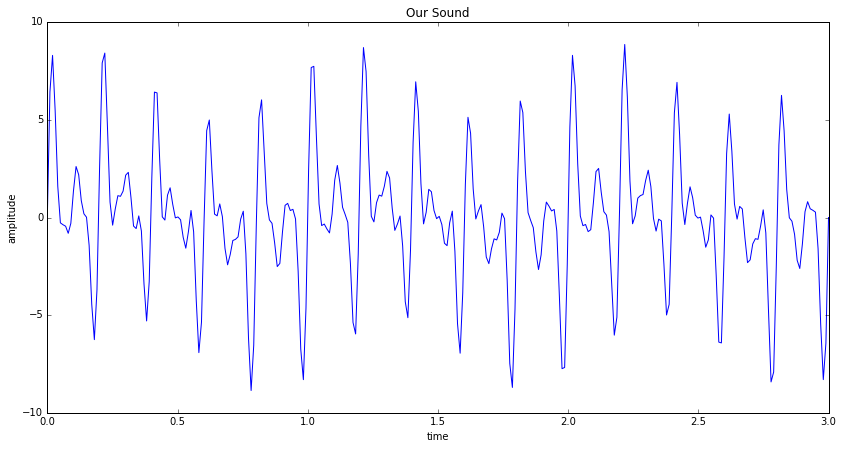

In [10]:

frequency_list = [1,20,10,5,15,11] #hz
amplitude_list = [1,1.5,3,2,2.2,1.2]  
time = 3 #seconds 
sample_rate = 100 #hz (samples per second)
number_samples = sample_rate * time

lin_time = np.linspace(0,time,number_samples) # time

harmonics = []
"""
This builds a list of np.arrays all generated from the sinewave with frequency and amplitude sampled from the 
supplied lists. 
"""
for i in xrange(len(frequency_list)):
    simple_signal = [amplitude_list[i] * np.sin(frequency_list[i] * j * 2*np.pi) for j in lin_time ]
    harmonics.append(simple_signal)
    

# sum signals 
comb_signal = harmonics.pop()
while len(harmonics) != 0:
    comb_signal = [sum(t) for t in zip(comb_signal, harmonics.pop())]



fig_wav = plt.figure()
fig_wav.set_size_inches(14,7)
subplt = fig_wav.add_subplot(111)
subplt.set_title("Our Sound")
subplt.set_xlabel("time")
subplt.set_ylabel("amplitude")
subplt.plot(lin_time, comb_signal)

The Fourier Transform will be done using the Fast Fourier Transform function found in numpy.        
Source for Code Below 
https://docs.scipy.org/doc/numpy/reference/routines.fft.html

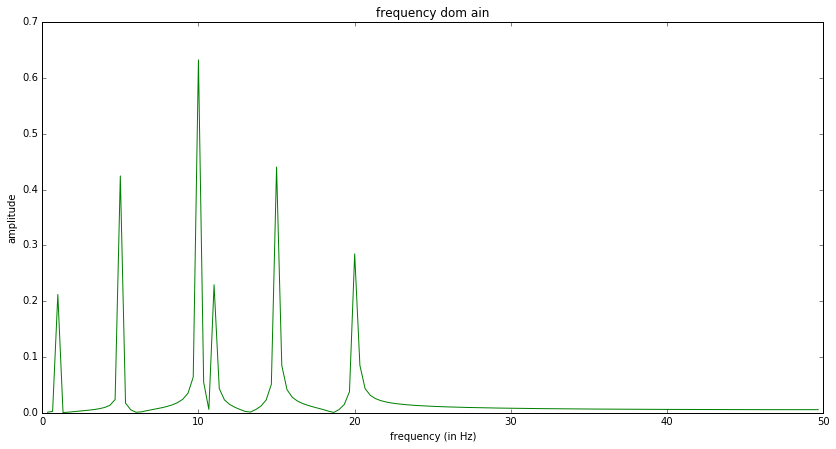

In [11]:
def fourierTransform(sound, sample_rate):
    # Preform a Fast Fourier Transfrom using numpy's function
    fft = np.fft.fft(sound) 
    # Pramaeters about the sound
    number_samples = len(sound)        
    len_sample = 1./sample_rate 
    
    # Generates Discrete bins for the sample spacing
    freqs= np.fft.fftfreq(number_samples, len_sample)  
    positive_freq = np.where(freqs>0)
    # only need positive frequencys 
    freqs = freqs[positive_freq]
    mags = abs(fft[positive_freq]) 
    mags = mags / np.linalg.norm(mags)
    return (freqs,mags)


(freq,mag) = fourierTransform(comb_signal, 100)
# plot the frequency domain 
fig_wav = plt.figure()
fig_wav.set_size_inches(14,7)
subplt_freq = fig_wav.add_subplot(111)
subplt_freq.set_title("frequency dom ain")
subplt_freq.set_xlabel('frequency (in Hz)')
subplt_freq.set_ylabel('amplitude')
plt.plot(freq, mag, 'green')

The plot above is the frequency domain of the waveform generated earlier, notice how there are peaks in the plot that all represent the individual waveforms that made up the signal. 

##  Spectrograms 

As we know a  song or melody is not just a single tone or note, it is a complex pattern of sounds and tones.  So to visualize a song in the frequency domain a spectrogram is used. A spectrogram is representation of  a sounds frequency that vary over time (simply a Fourier Transform over time). 

We will be using the matplotlib's specgram function that generates a spectrogram where the x-axis is time, the y-axis is frequency and the color represents the amplitude at that point. 




In [7]:
#very important audio
(neverGonnaGiveYouUp_rate, neverGonnaGiveYouUp) = scipy.io.wavfile.read("music/NeverGonnaGiveYouUp_mono.wav")
"""REMOVED TO SAVE SPACE"""
#Audio(neverGonnaGiveYouUp, rate = neverGonnaGiveYouUp_rate)

'REMOVED TO SAVE SPACE'

#### Spectrogram of first 3 seconds 

(array([[  5.40315880e-08,   1.26052936e-07,   1.24057044e-08, ...,
           9.77529408e+03,   1.99542457e+03,   7.82197057e+02],
        [  2.89898892e-08,   4.07337177e-07,   1.44389913e-07, ...,
           2.30305351e+04,   6.81609583e+03,   8.00138138e+03],
        [  3.13215512e-07,   2.44967172e-07,   1.19293166e-07, ...,
           1.78691421e+04,   1.04935345e+04,   7.68150556e+03],
        ..., 
        [  4.89614331e-05,   1.14936936e-03,   3.64842826e-04, ...,
           2.93618061e-04,   1.71058089e-03,   4.15185320e-03],
        [  2.48870748e-04,   2.30114142e-03,   1.57064334e-03, ...,
           4.13418271e-04,   2.38367400e-04,   2.68637965e-03],
        [  5.68917470e-06,   1.92240913e-03,   1.06471330e-03, ...,
           8.97079212e-06,   5.28312177e-04,   3.82125693e-04]]),
 array([     0.      ,    172.265625,    344.53125 ,    516.796875,
           689.0625  ,    861.328125,   1033.59375 ,   1205.859375,
          1378.125   ,   1550.390625,   1722.65625 ,   1

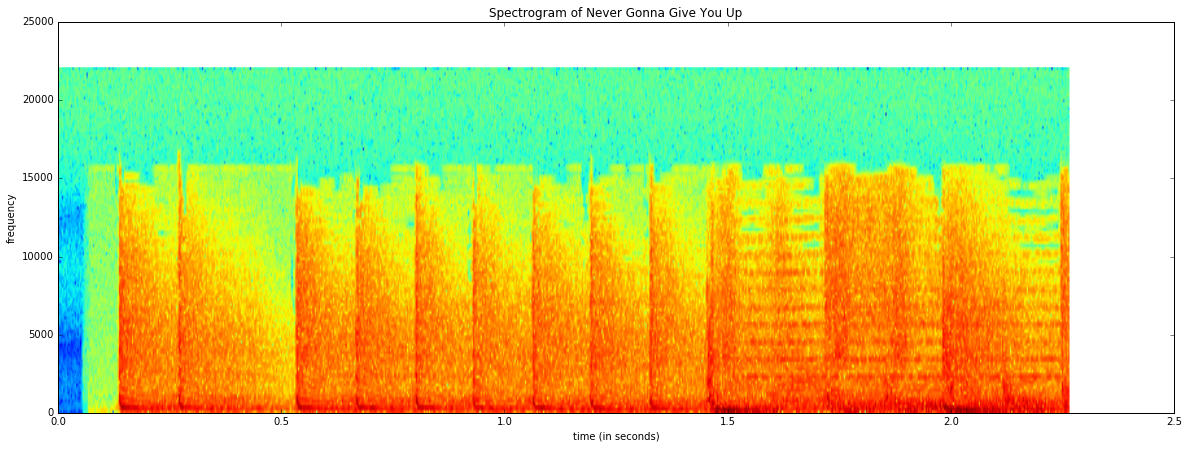

In [7]:
fig_spec = plt.figure()
fig_spec.set_size_inches(20,7)
subplt_spec = fig_spec.add_subplot(111)
subplt_spec.set_title("Spectrogram of Never Gonna Give You Up")
subplt_spec.set_xlabel('time (in seconds)')
subplt_spec.set_ylabel('frequency')

plt.specgram(neverGonnaGiveYouUp[0:100000], Fs = neverGonnaGiveYouUp_rate)


## Audio Effects

One common use for computer music is the application of different effects that change and distort the sound to give the sound a richer quality.  

We will be implementing Delay-Based Audio Effects, where effects are generated by adding processed signal to the original source. Many effects including reverb, echo, and flanging are implemented with this same method. 



### Echo 

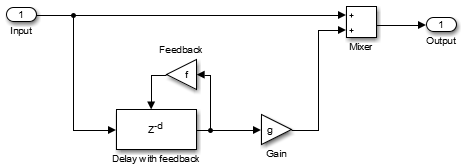

In [10]:
Image("https://www.mathworks.com/help/examples/audio_product/delayEffectsEcho.png" )

 The Process of implementing the echo effect is as follows: 

1. A copy of the input audio is made, so that the original audio remains unchanged. 
2. A delay is applied to the copied signal. 
3. The delayed signal is passed through a linear gain, and recombined with the original audio. 

In [25]:
from scipy.ndimage.interpolation import shift # An easy way to shift numpy arrays 

# audio <- np.array of audio (Mono)
# audio_sample_rate <- sample rated of input audio
# offset <- the "strength" of the echo in MS
def echo_effect(audio,audio_sample_rate,offset):
    start_offset = (offset * (audio_sample_rate / 1000)) # the delay number of samples 
    b =  np.copy(audio) # copy original audio
    b =  shift(b,start_offset,cval=0)
    return np.add(audio,b)
   
    

In [26]:
rick_roll_echo = echo_effect(neverGonnaGiveYouUp, neverGonnaGiveYouUp_rate, 30)

In [8]:
"""REMOVED TO SAVE SPACE"""
#Audio(rick_roll_echo, rate = neverGonnaGiveYouUp_rate)

'REMOVED TO SAVE SPACE'

### An Aside: Hearing Moving Averages

In [28]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

avg_rick_roll = moving_average(neverGonnaGiveYouUp, n= 20)


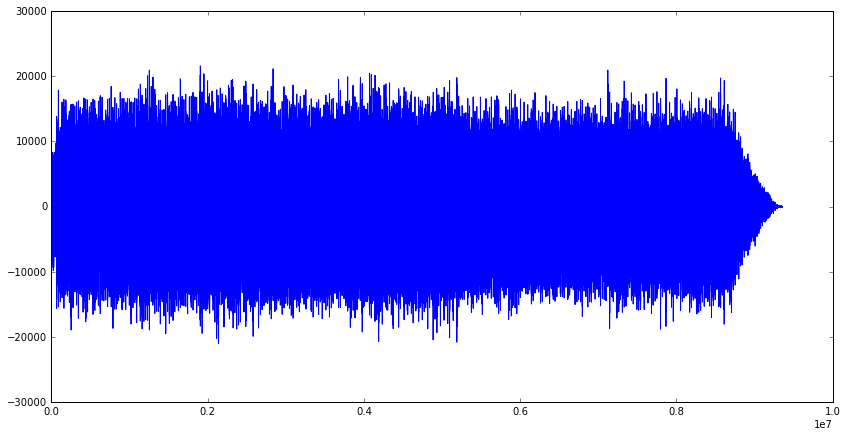

In [29]:
fig_wav = plt.figure()
fig_wav.set_size_inches(14,7)
subplt = fig_wav.add_subplot(111)
subplt.plot(avg_rick_roll)

In [9]:
"""REMOVED TO SAVE SPACE"""
#Audio(avg_rick_roll, rate = neverGonnaGiveYouUp_rate)

'REMOVED TO SAVE SPACE'

# Example With Real Audio Dataset 

Now that we have learned the basics of waveform analysis, Lets apply this to a larger scale: music.  In the context of data science we may be interested in building a classifier for different   types of music. Where a function is able to take in a large collection of different audio files, extract features from each files waveform, and group them into relevant categorizes.  Some of the categorize could be genre, tone, temp, or what type of instruments were used. 

For this example we will be working with a subset of 461 total .wav files all ten seconds in length. The files were soured from a dataset from technische universitat dortmund containt 1886 songs in total. http://www-ai.cs.uni-dortmund.de/audio.html  

## Import the Audio Files 

### WARNING: THIS USES A LOT OF RAM

The first step is to read all the files into numpy arrays from the music directory. Each genera will be represented by a 2-D numpy array where each element is a tuple of the audio, and the audio's sample rate. 

In [10]:
"""REMOVED TO SAVE SPACE"""
#Audio("music/alternative_wav/Chance_-Say_What_You_Will.wav") # Alternative 

'REMOVED TO SAVE SPACE'

In [11]:
"""REMOVED TO SAVE SPACE"""
#Audio("music/pop_wav/Sepiamusic-Fall_Into_Me.wav") # Pop

'REMOVED TO SAVE SPACE'

In [12]:
"""REMOVED TO SAVE SPACE"""
#Audio("music/raphiphop_wav/AK_MC_s-This_is_not_a_test.wav") # Rap & Hip Hop

'REMOVED TO SAVE SPACE'

In [14]:
#To efficiently iterate over the files in the music directory, the glob package is used.  https://docs.python.org/2/library/glob.html
def read_wav_files(path):
    wav_files = []
    for files in glob.glob(path):
        wav_files.append(scipy.io.wavfile.read(files))
    return wav_files 

alternative = read_wav_files('music/alternative_wav/*')
pop = read_wav_files('music/pop_wav/*')
rapHipHop = read_wav_files('music/raphiphop_wav/*')
    
 
print "Number of Alternative Samples " + str(len(alternative))
print "Number of Pop Samples " + str(len(pop))
print "Number of Rap/Hip Hop Samples " + str(len(rapHipHop))

Number of Alternative Samples 145
Number of Pop Samples 116
Number of Rap/Hip Hop Samples 200


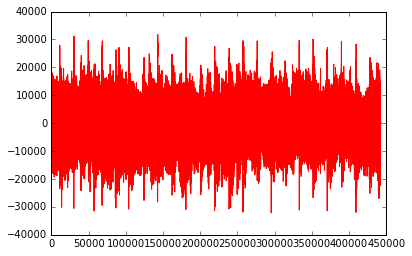

In [15]:
plt.plot(alternative[0][1][:, 0], 'red') # Right Channel

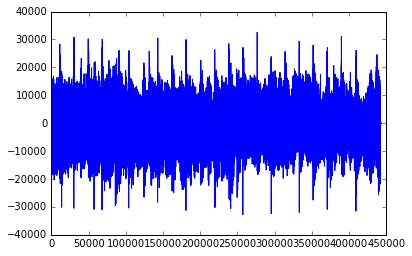

In [17]:
plt.plot(alternative[0][1][:, 1], 'blue')# Left Channel

## Calculate Frequency Spectra


The next step will to be to look at total Frequency Spectra of each genera.  This will be done using three different functions, the first function is the same Fourier Transform function that was used before. The second function, find_freq_all, iterates over each genera array, preforming a Fourier Transform on each Audio channel separately. Returning an array of equal length as the genera array, where each element is a tuple of the right channel frequency spectra, and the left channel frequency spectra.  The last function, plot_spectra, plots all the sampled frequency spectra in an array into one plot. 


In [39]:

def find_freq_all(wav_files):
    num_songs = len(wav_files)
    frequency_spectra = []
    for i in xrange(num_songs):
        # Right chanel 
        chan0 = fourierTransform(wav_files[i][1][:, 0], wav_files[i][0])
        # Left Chanel 
        chan1 = fourierTransform(wav_files[i][1][:, 1], wav_files[i][0])
        frequency_spectra.append((chan0,chan1))
    return frequency_spectra


def plot_spectras(spectras,name, color = 'blue'):
    num_songs = len(spectras)
    fig = plt.figure()
    fig.set_size_inches(20,7)
    subplt_freq = fig.add_subplot(111)
    subplt_freq.set_title("frequency domain" + name)
    subplt_freq.set_xlabel('frequency (in Hz)')
    subplt_freq.set_ylabel('amplitude')
    subplt_freq.set_xlim([20,5000])
    for i in xrange(num_songs):
        plt.plot(spectras[i][0][0],spectras[i][0][1], color)
        plt.plot(spectras[i][1][0],spectras[i][1][1], color)
    
    
    

In [40]:
alternative_spectras = find_freq_all(alternative)
pop_spectras = find_freq_all(pop)
rapHipHop_spectras = find_freq_all(rapHipHop)

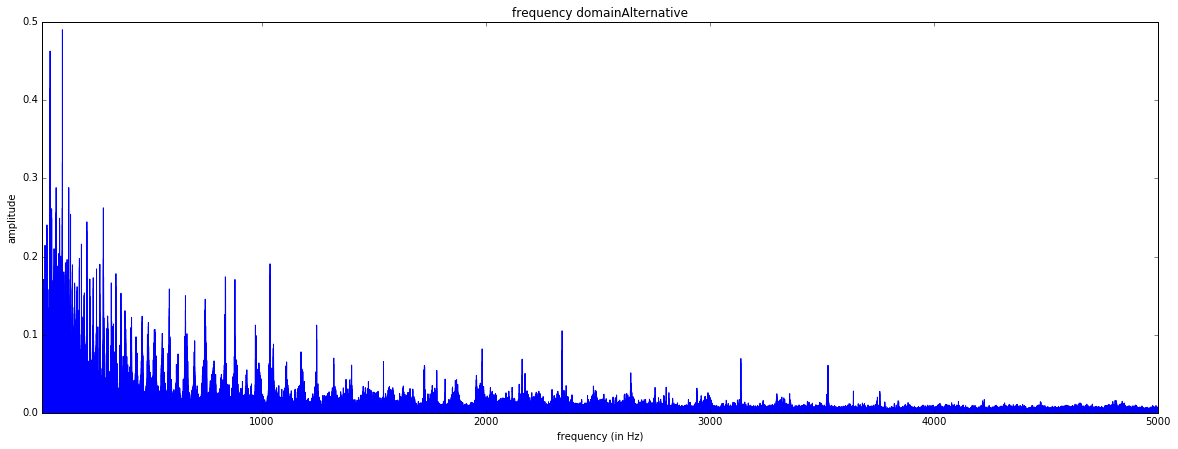

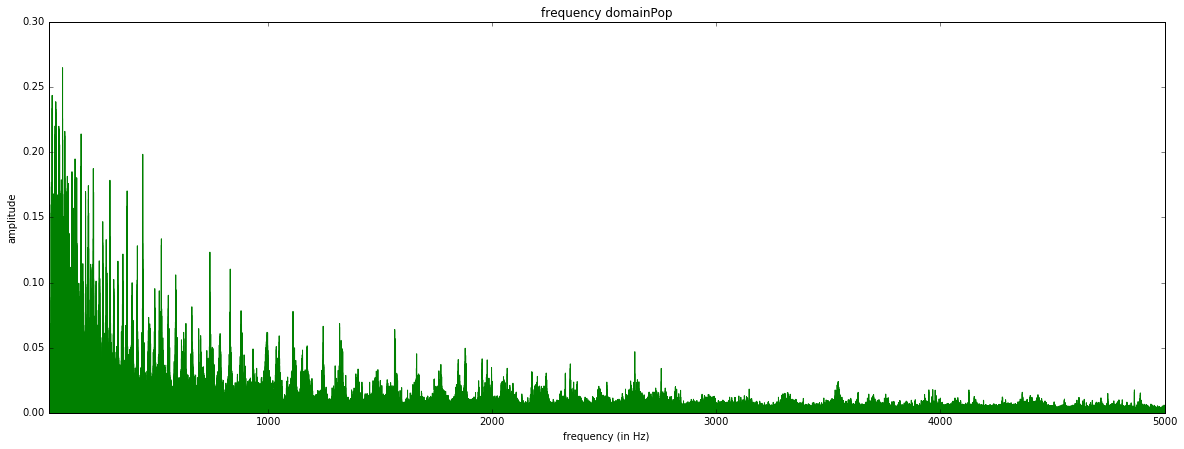

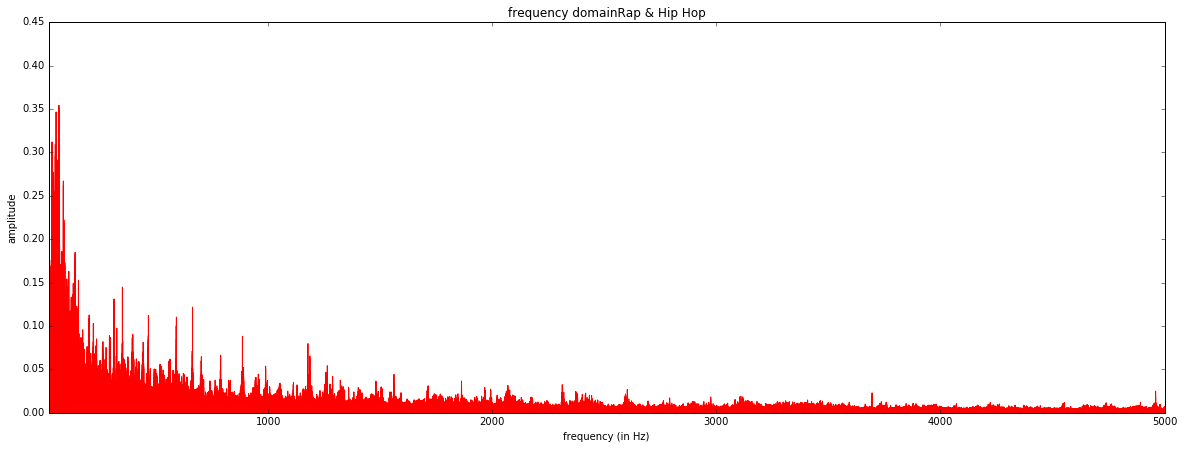

In [37]:
plot_spectras(alternative_spectras, "Alternative") # Sum of Spectras for Alternative
plot_spectras(pop_spectras,"Pop", color = "green") # Sum of Spectras for Pop
plot_spectras(rapHipHop_spectras,"Rap & Hip Hop", color = "red")# Sum of spectras for Rap & Hip Hop

Both Alternative and Pop have similar spectra, while Rap & Hip Hop has most of it's spikes, closer to the lower end of the spectra. This indicates that Rap & Hip Hop are more rhythm driven with deeper base and drum notes.  

## Conclusion

Now that we have good understanding about the basics of sound, it will be easy to expand this analysis with more complex methods.  One could build a classifier that will look at an arbitrary sound sample and group it in to any number or possible genres or categorizes. Another idea is to build a tool that will help with music discovery, by sunsetting similar songs that could fit and individual's taste profile. There is also a lot of potential of algorithmic composition where one could build a program that could use the dataset of sound clips as a seed to generate new works of music entirely.

Now that we have formated audio files into a simple numpy array, the number of possibilities for cool projects is only limited by your time.  


If you are more interested in Audio Analysis here are some good resources.

Automatic Feature Extraction for Classifying Audio Data
http://www-ai.cs.uni-dortmund.de/PublicPublicationFiles/mierswa_morik_2005a.pdf

Million Song Dataset 
http://labrosa.ee.columbia.edu/millionsong/pages/getting-dataset#subset

Sound R.Luke DuBois and Wilm Thoben 
https://processing.org/tutorials/sound/

#### Sources 
http://www.galvanize.com/blog/data-science-projects-classifying-and-visualizing-musical-pitch/

http://www-ai.cs.uni-dortmund.de/audio.html

http://www.mrcolson.com/2016/04/21/Simple-Python-FM-Synthesis.html